<img src="cyberlabs..jpg" style="width:300px;height:300px"/>

<img src="ml_logo.png" style="width:300px;height:300px"/>

<img src="woc_logo-fullsize.png" style="width:200px;height:200px"/>

#  ML Essentials

# Exploratory Data Analysis (EDA)

*  Importing  libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

* Loading the data set

In [4]:
   data=pd.read_csv('kmeans_dataset.csv')  #defining a variable named as data for loaded dataset

 * Basic data exploration

In [4]:
data.head()                          # head function will give the 5 records from top of dataset

,Hardwork,Skills,Label
0,1.483358,6.135020,C Tier
1,52.864104,48.897037,B Tier
2,67.556683,19.359183,D Tier
3,52.797684,43.650076,B Tier
4,45.060080,74.978268,B Tier


In [5]:
data.tail()                           # tail function will give the 5 records from bottom of dataset

,Hardwork,Skills,Label
455,48.414533,53.807818,B Tier
456,49.534222,54.425778,B Tier
457,30.457458,40.396009,B Tier
458,2.277720,5.085407,C Tier
459,37.012233,51.093717,B Tier


In [6]:
data.Label.unique()

array(['C Tier', 'B Tier', 'D Tier', 'A Tier'], dtype=object)

In [7]:
data.shape                                 #shape function gives the number of rows and columns present in dataset

(460, 3)

In [8]:
data.info()                                #info function gives breif information about loaded dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Hardwork  460 non-null    float64
 1   Skills    460 non-null    float64
 2   Label     460 non-null    object 
dtypes: float64(2), object(1)
memory usage: 10.9+ KB


In [9]:
data.isnull().sum()                        #veifying if data contains any missing values

Hardwork    0
Skills      0
Label       0
dtype: int64

In [8]:
data.describe()  #describe function shows different aspects of data such as minimum,maximum,mean and different percentile values

,Hardwork,Skills
count,460.000000,460.000000
mean,47.019178,38.439590
std,24.895360,26.136017
min,0.712341,1.447058
25%,25.287181,13.987334
50%,48.519039,38.515372
75%,67.467031,60.161463
max,97.618528,95.704652


* Handling Missing Values

In [10]:
data.isnull().sum()                        # There is no missing values in the dataset

Hardwork    0
Skills      0
Label       0
dtype: int64

* Data analysis through plots

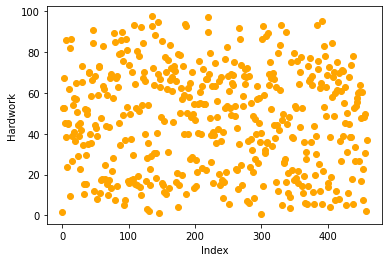

In [11]:
plt.scatter(data.index,data['Hardwork'],color="orange")
plt.xlabel('Index')
plt.ylabel("Hardwork")
plt.show()                                  #plotting scatter-plot representing Hardwork against index or observation No.

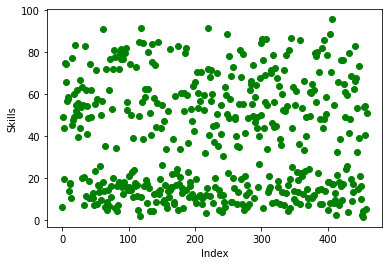

In [12]:
plt.scatter(data.index,data['Skills'],color="green") #plotting scatter-plot representing Skills against index or observation No.
plt.xlabel('Index')
plt.ylabel("Skills")
plt.show()

Text(0, 0.5, 'Frequency')

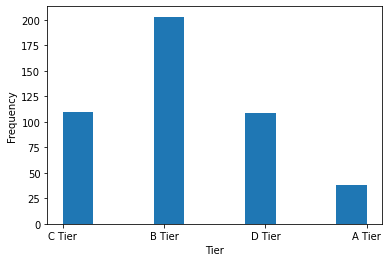

In [11]:
plt.hist(data['Label'])                           #plotting histogram for tier against its frequency
plt.xlabel('Tier')
plt.ylabel("Frequency")

In [13]:
data.corr()                                           #corr function shows correlation between different features

,Hardwork,Skills
Hardwork,1.000000,0.231967
Skills,0.231967,1.000000


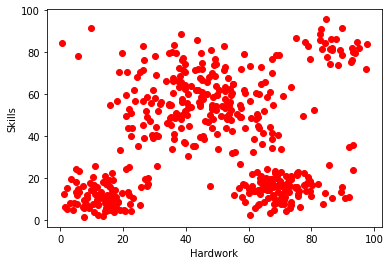

In [14]:
plt.scatter(data['Hardwork'],data['Skills'],color='red')          #plotting scatter-plot representing Skills against Hardwork
plt.xlabel('Hardwork')
plt.ylabel("Skills")
plt.show()

* Handling Outliers       (outliers are observations which are very far from other data)


<AxesSubplot:>

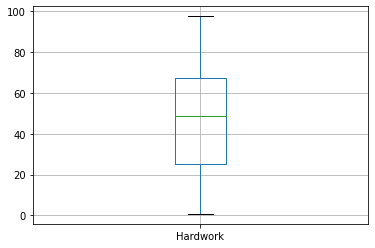

In [14]:
data.boxplot("Hardwork")      #verifying if data contains outliers by plotting boxplot (conclusion:NO outliers is present)

<AxesSubplot:>

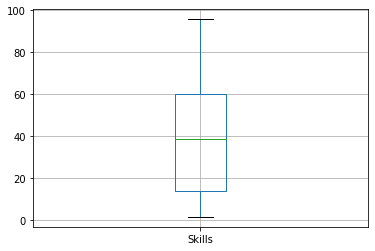

In [15]:
data.boxplot("Skills")                   #(conclusion: NO outliers are present)

* Normalization and Scaling : Standardizing the variables

In [16]:
# Since data is on same scales this part is not needed to be performed

 * Univariate Analysis

In [16]:
data_A=data.loc[data['Label']=='A Tier']              #defining variables particularly for observations belonging to each Tier 
data_B=data.loc[data['Label']=='B Tier']              #   using .loc function
data_C=data.loc[data['Label']=='C Tier']
data_D=data.loc[data['Label']=='D Tier']

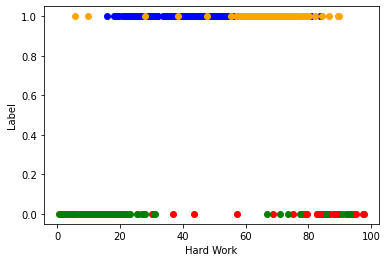

In [17]:
plt.scatter(data_A['Hardwork'],np.zeros_like(data_A['Hardwork']),color="red")
plt.scatter(data_B['Hardwork'], np.ones_like(data_B['Hardwork']),color="blue")   
plt.scatter(data_C['Hardwork'],np.zeros_like(data_C['Hardwork']),color="green")   
plt.scatter(data_D['Hardwork'], np.ones_like(data_D['Hardwork']),color="orange")   
plt.xlabel('Hard Work')                                                            
plt.ylabel('Label')                                                             
plt.show()                                                                  #Plotting Scatterplot univariate(Hardwork) Analysis

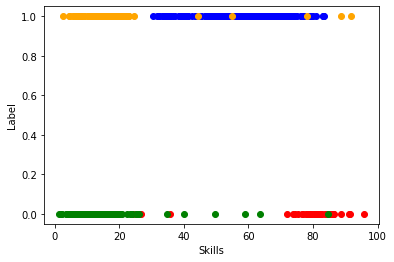

In [18]:
plt.scatter(data_A['Skills'],np.zeros_like(data_A['Skills']),color="red")#Plotting Scatterplot univariate(Skills) Analysis
plt.scatter(data_B['Skills'], np.ones_like(data_B['Skills']),color="blue")           
plt.scatter(data_C['Skills'],np.zeros_like(data_C['Skills']),color="green")           
plt.scatter(data_D['Skills'], np.ones_like(data_D['Skills']),color="orange")          
plt.xlabel('Skills')                                                      
plt.ylabel('Label')                                                     
plt.show()    

* Bivariate Analysis

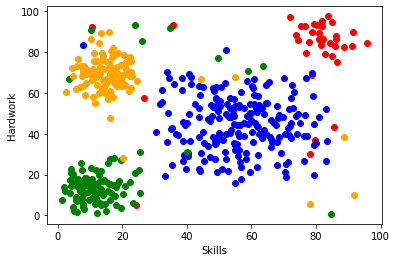

In [19]:
plt.scatter(data_A['Skills'],data_A['Hardwork'],color="red")  #plotting scatter-plot representing Hardwork against Skills
plt.scatter(data_B['Skills'],data_B['Hardwork'],color="blue")
plt.scatter(data_C['Skills'],data_C['Hardwork'],color="green")
plt.scatter(data_D['Skills'],data_D['Hardwork'],color="orange")
plt.xlabel('Skills')
plt.ylabel('Hardwork')
plt.show()

<img src="hardwork.jpg" style="width:200px;height:200px"/>

# K-Means Clustering

* Train Test Split

In [20]:
from sklearn.model_selection import train_test_split #splitting the dataset using sklearn,(60:20:20) as training,validation,test

data, data_test = train_test_split(data,test_size=0.2,train_size=0.8)
data_train, data_valid = train_test_split(data,test_size = 0.25,train_size =0.75)

In [27]:
data_train.shape

(276, 3)

In [21]:
data_train.head()

,Hardwork,Skills,Label
224,26.268696,56.570951,B Tier
32,15.336225,7.206248,C Tier
55,73.114635,16.122849,D Tier
255,49.240463,68.504529,B Tier
268,86.663179,80.942087,A Tier


In [22]:
data_train.tail()

,Hardwork,Skills,Label
424,38.790354,76.312130,B Tier
356,21.518121,13.342820,C Tier
50,68.417158,23.110767,D Tier
399,68.682061,78.627201,A Tier
322,63.016328,44.893451,B Tier


In [28]:
data_test.shape

(92, 3)

In [23]:
data_test.head()

,Hardwork,Skills,Label
223,79.838403,11.233729,D Tier
406,84.730050,95.704652,A Tier
75,21.957008,52.768351,B Tier
64,24.867728,35.371319,B Tier
299,0.712341,84.583743,C Tier


In [24]:
data_test.tail()

,Hardwork,Skills,Label
253,52.615691,57.789559,B Tier
199,54.808556,42.397006,B Tier
210,23.236372,10.275827,C Tier
334,26.322862,71.492513,B Tier
350,79.672734,13.866400,D Tier


In [29]:
data_valid.shape

(92, 3)

In [25]:
data_valid.head()

,Hardwork,Skills,Label
57,11.010126,25.607435,C Tier
230,74.920431,15.893858,D Tier
231,63.574123,19.903922,D Tier
282,5.920891,13.204539,C Tier
77,28.029849,20.104359,D Tier


In [26]:
data_valid.tail()

,Hardwork,Skills,Label
66,43.843294,72.026543,B Tier
133,22.586215,50.960454,B Tier
205,54.821932,60.763166,B Tier
165,61.113668,22.089605,D Tier
22,50.560716,61.833491,B Tier


* Applying KMeans 

In [30]:
from sklearn.cluster import KMeans
%matplotlib inline

In [31]:
sse = []                                                      #validation by sum of squared error method
for k in range(1,10):
    km = KMeans(n_clusters=k)
    km.fit(data_valid[['Skills','Hardwork']])
    sse.append(km.inertia_)

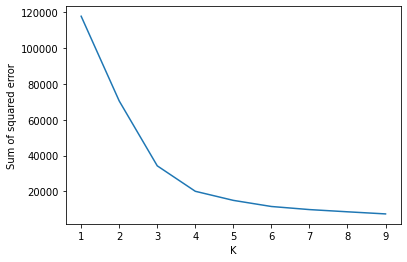

In [32]:
plt.xlabel('K')                                               #Plotting elbow plot for depicting the numbers of clusters
plt.ylabel('Sum of squared error')                            #conclusion - number of clusters should be 4
plt.plot(range(1,10),sse)

In [33]:
km = KMeans(n_clusters=4)                                                 #declaring the number of clusters

In [34]:
km.fit(data_train[['Skills','Hardwork']],data_train['Label'])             #fitting  the data or training our model

KMeans(n_clusters=4)

In [35]:
km.cluster_centers_                                                    #shows the cartesian coordinates of centeroid of clusters

array([[16.25198192, 70.08094949],
       [58.22790947, 44.1286289 ],
       [10.63610575, 13.70098214],
       [78.55894661, 85.34214607]])

* Testing

In [36]:
data_predict=km.predict(data_test[['Skills','Hardwork']])                  #predicting labels for testing dataset

In [37]:
data_predict.shape

(92,)

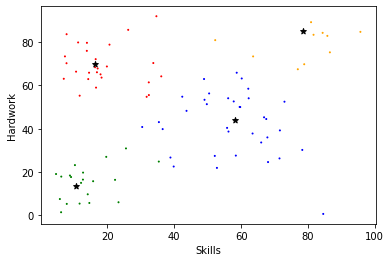

In [38]:
plt.scatter(data_test['Skills'],data_test['Hardwork'],data_predict==0,color='red')    #plotting scatterplot for testing dataset
plt.scatter(data_test['Skills'],data_test['Hardwork'],data_predict==1,color='blue')
plt.scatter(data_test['Skills'],data_test['Hardwork'],data_predict==2,color='green')
plt.scatter(data_test['Skills'],data_test['Hardwork'],data_predict==3,color='orange')
plt.xlabel('Skills')
plt.ylabel('Hardwork')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')
plt.show()

# THE END